In [1]:
#Deterministic behavior of the pathosystem under strict parameters
#ref: Markle and Tellier 2020 (PLoS Comp Biology)
#ref: Introduction to Coevolutionary Theory (Scott Nuismer)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [335]:
def avirulenceFreq_2(a_freq,recR,  c_p):
    assert a_freq <= 1
    assert a_freq >= 0
    assert recR <= 1
    assert recR >= 0
    num = a_freq * (1 - c_p)
    denom = num + (1-a_freq) * recR
    return num/denom

In [336]:
def avirulenceFreq_1(a_freq, recR, c_p):
    aF2 = avirulenceFreq_2(a_freq, recR, c_p)
    #print(aF2)
    x = ((1-a_freq * aF2)+a_freq)+ recR * a_freq
    num = (1-c_p) * ((1-recR)*((1-a_freq * aF2)+a_freq)+ recR * a_freq)
    denom = num + recR*(1-a_freq)
    return num/denom

In [337]:
def domResFreq(a_freq,recR,  c_p,c_h, s_1, s_2):
    one = (1-recR)* (1-c_h)

    avir_1 = avirulenceFreq_1(a_freq, recR, c_p)
    avir_2 = avirulenceFreq_2(a_freq,recR,  c_p)
    Avir_1 = 1-avir_1
    Avir_2 = 1-avir_2

    two = Avir_1* Avir_2 + Avir_1*avir_2*(1-s_2)+ avir_1*(1-s_1)

    num = one*two
    ############################
    three = recR * (1-s_1)
    ###########################
    denom = num+three

    domResFreq = num/denom
    recR = 1-domResFreq
    a_freq = avir_1
    return list(recR, a_freq)
        

In [424]:
def domResFreq(a_freq,recR,  c_p,c_h, s_1, s_2, ngen= 100):
    recRList = []
    a_freqList =[]
    ngenList=[]
    ngenfinal = 0 
    while ngenfinal < ngen:
        one = (1-recR)* (1-c_h)

        avir_1 = avirulenceFreq_1(a_freq, recR, c_p)
        avir_2 = avirulenceFreq_2(a_freq, c_p, recR)
        Avir_1 = 1-avir_1
        Avir_2 = 1-avir_2

        two = Avir_1* Avir_2 + Avir_1*avir_2*(1-s_2)+ avir_1*(1-s_1)

        num = one*two
        ############################
        three = recR * (1-s_1)
        ###########################
        denom = num+three

        domRes = num/denom
        recR = 1-domRes
        recRList.append(recR)
        a_freqList.append(avir_1)
        ngenList.append(ngenfinal)
        ngenfinal=ngenfinal+1
    return(recRList, a_freqList, ngenList)

In [431]:
x = ((domResFreq(a_freq=0.99, recR=0.9,c_p=0.3,c_h=0.00001, s_1=0.1, s_2=0.1, ngen = 100000)))

In [18]:

def calcTrajectory(px,py,τx,τy,sx,sy,Wx_av, Wy_av, ngen = 10):
    '''
    calculates trajectory of host and pathogen allele frequencies in a deterministic manner
    px = host resistance gene frequency
    py = pathogen avirulence gene freq
    τx = cost of resistance
    τy = cost of pathogenicity
    sx = cost of pathogen infection on host
    sy = cost of host resistance on pathogen
    Wx_av = host fitness averaged over ngen
    Wy_av = pathogen fitness averaged over ngen
    ngen = number of generations (default = 10)
    '''
    pxList = []
    pyList = []
    i = 0 # generation 0
    while i < ngen:
        
        qx = 1 - px
        qy = 1 - py
        
        δPx = px*qx * (sx*qy -τx)/Wx_av #change in host allele freq from one generation to another
        δPy = py*qy * (sy*px -τy)/Wy_av #change in pathogen allele freq from generation to generation

        px = px + δPx # allele freq in next generation
        py = py + δPy # allele freq in next generation
        
        pxList.append(px)
        pyList.append(py)
        
        i+=1 #incrementing generation
    
    return list((pxList, pyList));
    
    
    
    

In [67]:
def makeplot(px,py,τx,τy,sx,sy,Wx_av, Wy_av, ngen = 10):
    fig, axes = plt.subplots(3,3, figsize=(8,8),sharex=True, sharey=True)
    for i , ax in enumerate(axes.flatten()):
        sx=i
        x = calcTrajectory(px,py,τx,τy,i*0.1,sy,Wx_av, Wy_av, ngen )
        ax.plot(x[0],x[1], marker = "o", color = "k", markersize=0.01, alpha=0.3)
        #ax.plot(x[0],x[1], marker = "o", color = "g", markersize=0.1)
        ax.plot(x[0][-1],x[1][-1], marker = "x", color ='k', markersize = 6)
        
        #ax.title("sx")
        ax.set_title(f"sx = {sx*0.1:.1f}")
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.suptitle("Cost of infection (on host)", size = 20)

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)

In [71]:
interact(makeplot,px=(0.1,1,0.1),py=(0.1,1,0.1),τx=(0,1,0.01),τy=(0.1,1,0.1),sx=fixed(1),
          sy=(0.1,1,0.1),Wx_av=(0.01,1,0.1), Wy_av=(0.01,1,0.1), ngen=(100,100000,100),
         __output_result=False )

interactive(children=(FloatSlider(value=0.5, description='px', max=1.0, min=0.1), FloatSlider(value=0.5, descr…

<function __main__.makeplot(px, py, τx, τy, sx, sy, Wx_av, Wy_av, ngen=10)>

In [124]:
def calcTrajectoryDrift(N_x, N_y, px,py,τx,τy,sx,sy,Wx_av, Wy_av, ngen = 10):
    '''
    calculates trajectory of host and pathogen allele frequencies in a deterministic/stochastic manner
    N_x = number of host individuals
    N_y = number of pathogen individuals
    px = host Resistance gene frequency
    py = pathogen avirulence gene freq
    τx = cost of resistance
    τy = cost of pathogenicity
    sx = cost of pathogen infection on host
    sy = cost of host resistance on pathogen
    Wx_av = host fitness averaged over ngen
    Wy_av = pathogen fitness averaged over ngen
    ngen = number of generations (default = 10)
    '''
    pxList = []
    pyList = []
    i = 0 # generation 0
    while i < ngen:
        
        qx = 1 - px
        qy = 1 - py
        
        δPx = px*qx * (sx*qy -τx)/Wx_av #change in host allele freq from one generation to another
        δPy = py*qy * (sy*px -τy)/Wy_av #change in pathogen allele freq from generation to generation

        px = px + δPx # allele freq in next generation
        
        if px >=1:
            px =1
        elif px <=0:
            px =0
        else:
            px = px
            
        new_px = ((binom.stats(N_x,px)[0]).item(0)/N_x) # drift
                
        if new_px>=1:
            new_px = 1
        elif new_px <=0:
            new_px = 0
        else:
            new_px = new_px
        px = new_px
        
        py = py + δPy # allele freq in next generation
        if py >=1:
            py =1
        elif py <=0:
            py =0
        else:
            py = py
        
        new_py = ((binom.stats(N_y,py)[0]).item(0)/N_y) # drift
        
        if new_py > 1:
            new_py = 1
        elif new_py <=0:
            new_py = 0
        else:
            new_py = new_py
       
        py = new_py
        
        pxList.append(px)
        pyList.append(py)
        
        i+=1 #incrementing generation
    
    return list((pxList, pyList));

In [125]:
def makeplotDrift(N_x, N_y, px,py,τx,τy,sx,sy,Wx_av, Wy_av, ngen = 10):
    fig, axes = plt.subplots(3,3, figsize=(8,8),sharex=True, sharey=True)
    for i , ax in enumerate(axes.flatten()):
        sx=i
        x = calcTrajectoryDrift(N_x, N_y, px,py,τx,τy,i*0.1,sy,Wx_av, Wy_av, ngen )
        ax.plot(x[0],x[1], marker = "o", color = "k", markersize=0.01, alpha=0.3)
        #ax.plot(x[0],x[1], marker = "o", color = "g", markersize=0.1)
        ax.plot(x[0][-1],x[1][-1], marker = "x", color ='k', markersize = 6)
        
        #ax.title("sx")
        ax.set_title(f"sx = {sx*0.1:.1f}")
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.suptitle("Cost of infection (on host)", size = 20)

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)

In [126]:
interact(makeplotDrift,N_x=(10,100000,100),N_y=(10,100000,100),px=(0.1,1,0.1),py=(0.1,1,0.1),τx=(0,1,0.01),τy=(0.1,1,0.1),sx=fixed(1),
          sy=(0.1,1,0.1),Wx_av=(0.01,1,0.1), Wy_av=(0.01,1,0.1), ngen=(10,100000,10),
         __output_result=False )

interactive(children=(IntSlider(value=49910, description='N_x', max=100000, min=10, step=100), IntSlider(value…

<function __main__.makeplotDrift(N_x, N_y, px, py, τx, τy, sx, sy, Wx_av, Wy_av, ngen=10)>

In [139]:
def calcTrajectoryDriftMutation(N_x, N_y, px,py,τx,τy,sx,sy,Wx_av, Wy_av, ngen = 10):
    '''
    calculates trajectory of host and pathogen allele frequencies in a deterministic/stochastic manner
    N_x = number of host individuals
    N_y = number of pathogen individuals
    px = host Resistance gene frequency
    py = pathogen avirulence gene freq
    τx = cost of resistance
    τy = cost of pathogenicity
    sx = cost of pathogen infection on host
    sy = cost of host resistance on pathogen
    Wx_av = host fitness averaged over ngen
    Wy_av = pathogen fitness averaged over ngen
    ngen = number of generations (default = 10)
    '''
    pxList = []
    pyList = []
    i = 0 # generation 0
    while i < ngen:
        
        qx = 1 - px
        qy = 1 - py
        
        
        
        ####################################### For Host ##########################################
        δPx = px*qx * (sx*qy -τx)/Wx_av #change in host allele freq from one generation to another
        
        # Resistant (R) to resistant (r) allele with mutation modeled with Poisson distribution
        mut_xR = np.random.poisson(lam=(1e-5* (N_x*px)))
        
        # resistant(r) to Resistant (R) allele with mutation modeled with Poisson distribution
        mut_xr = np.random.poisson(lam=(1e-5* (N_x*qx))) 
        
        # allele freq in next generation
        px = px - (mut_xR /N_x) + (mut_xr/N_x) + δPx 
        
        ## check whether probability is within 0 and 1 (and adjust if not)
        if px >=1:
            px =1
        elif px <=0:
            px =0
        else:
            px = px
        
        ####Drift using random sampling from binomial distribution######    
        new_px = ((binom.stats(N_x,px)[0]).item(0)/N_x) # drift
                
        if new_px>=1:
            new_px = 1
        elif new_px <=0:
            new_px = 0
        else:
            new_px = new_px
        
        px = new_px # allele freq in next generation with drift taken into account
        ####################################### For Pathogen ######################################
        δPy = py*qy * (sy*px -τy)/Wy_av #change in pathogen allele freq from generation to generation

        mut_xy = np.random.poisson(lam=(1e-5* (N_y*py))) # avirulent (avr) to Avirulent (Avr) with mut (Poisson)
        mut_xY = np.random.poisson(lam=(1e-5* (N_y*qy))) # Avirulent(Avr) to avirulent (avr) with mut (Poisson)
        
        py = py - (mut_xy /N_y) + (mut_xY/N_y) + δPy 
        
        if py >=1:
            py =1
        elif py <=0:
            py =0
        else:
            py = py
        
        new_py = ((binom.stats(N_y,py)[0]).item(0)/N_y) # drift
        
        if new_py > 1:
            new_py = 1
        elif new_py <=0:
            new_py = 0
        else:
            new_py = new_py
       
        py = new_py # allele freq in next generation with drift taken into account
        
        pxList.append(px)
        pyList.append(py)
        
        i+=1 #incrementing generation
    
    return list((pxList, pyList));

In [140]:
def makeplotDriftMutation(N_x, N_y, px,py,τx,τy,sx,sy,Wx_av, Wy_av, ngen = 10):
    fig, axes = plt.subplots(3,3, figsize=(8,8),sharex=True, sharey=True)
    for i , ax in enumerate(axes.flatten()):
        sx=i
        x = calcTrajectoryDriftMutation(N_x, N_y, px,py,τx,τy,i*0.1,sy,Wx_av, Wy_av, ngen )
        ax.plot(x[0],x[1], marker = "o", color = "k", markersize=0.01, alpha=0.3)
        #ax.plot(x[0],x[1], marker = "o", color = "g", markersize=0.1)
        ax.plot(x[0][-1],x[1][-1], marker = "x", color ='k', markersize = 6)
        
        #ax.title("sx")
        ax.set_title(f"sx = {sx*0.1:.1f}")
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.suptitle("Cost of infection (on host)", size = 20)

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)

In [144]:
interact(makeplotDriftMutation,N_x=(10,10000,1000),N_y=(10,10000,1000),px=(0.1,1,0.1),py=(0.1,1,0.1),τx=(0,1,0.01),τy=(0.1,1,0.1),sx=fixed(1),
          sy=(0.1,1,0.1),Wx_av=(0.01,1,0.1), Wy_av=(0.01,1,0.1), ngen=(10,100000,10),
         __output_result=False )

interactive(children=(IntSlider(value=4010, description='N_x', max=10000, min=10, step=1000), IntSlider(value=…

<function __main__.makeplotDriftMutation(N_x, N_y, px, py, τx, τy, sx, sy, Wx_av, Wy_av, ngen=10)>

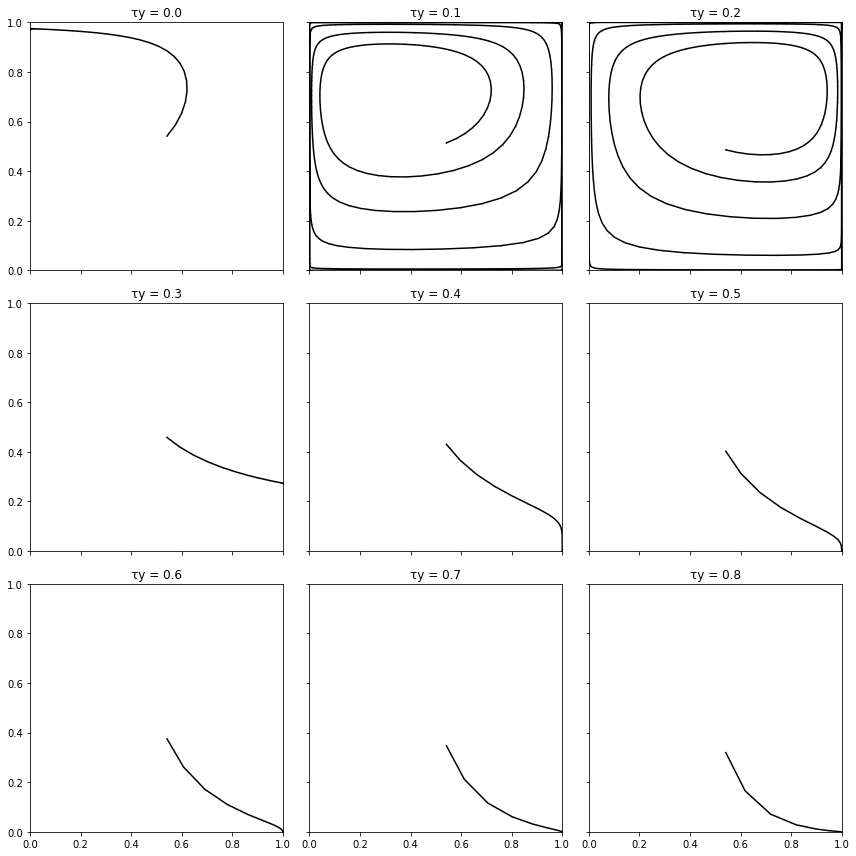

In [574]:
fig, axes = plt.subplots(3,3, figsize=(12,12),sharex=True, sharey=True)
for i , ax in enumerate(axes.flatten()):
    sx=i
    x = calcTrajectory(0.5,0.5,τx=0.2, τy =i*0.1, sx=0.7, sy =0.3,Wx_av =0.9, Wy_av=0.9, ngen=60000 )
    ax.plot(x[0],x[1], marker = "o", color = "k", markersize=0.1)
    #ax.title("sx")
    ax.set_title(f"τy = {i*0.1:.1f}")
plt.xlim(0,1)
plt.ylim(0,1)
plt.tight_layout()

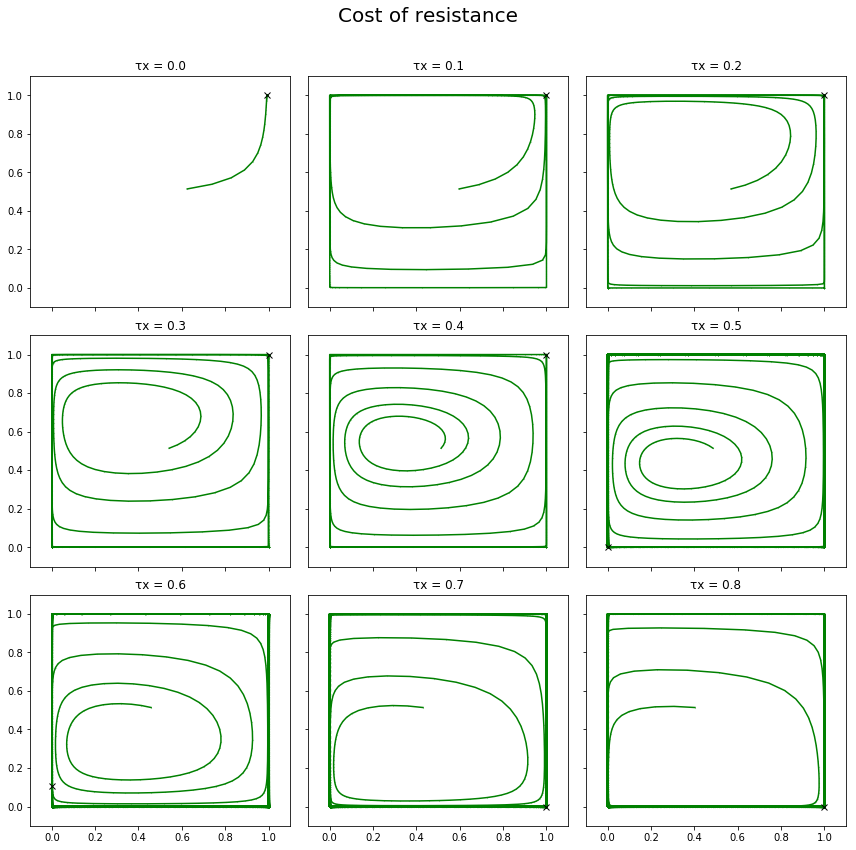

In [613]:
fig, axes = plt.subplots(3,3, figsize=(12,12),sharex=True, sharey=True)
for i , ax in enumerate(axes.flatten()):
    sx=i
    x = calcTrajectory(0.5,0.5,τx=i*0.1, τy =0.1, sx=0.9, sy =0.3,Wx_av =0.9, Wy_av=0.9, ngen=60000 )
    ax.plot(x[0],x[1], marker = "o", color = "g", markersize=0.1)
    ax.plot(x[0][-1],x[1][-1], marker = "x", color ='k', markersize = 6)
    #ax.title("sx")
    ax.set_title(f"τx = {i*0.1:.1f}")
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.suptitle("Cost of resistance", size = 20)

plt.tight_layout()
fig.subplots_adjust(top=0.9)